In [25]:
import wandb
api = wandb.Api()
import dataclasses
import utils
from transformers import AutoConfig

model_families = {
    'gpt2': [('gpt2', 'cb7j1cv8'), ('gpt2-medium', 'rr6f6brh'), ('gpt2-large', 'qjhxfznk'), ('gpt2-xl', 'bail0tuk')],
    'llama': [('meta-llama/Llama-2-7b-hf', 'vcmgan78')],
    'pythia': [('EleutherAI/pythia-70m', '1d4vql71'), ('EleutherAI/pythia-160m', 'xy6n6i36'), ('EleutherAI/pythia-410m', 'dmkd4rbs'), ('EleutherAI/pythia-1.4b', 'rbf6xqn3'), ('EleutherAI/pythia-2.8b', 'p55zipi8')]
}

@dataclasses.dataclass
class Plot:
    title: str
    plt_scatter_kwargs: list[dict] = dataclasses.field(default_factory=list)

def get_plot(model_family):
    plot = Plot(model_family)
    for model, run_id in model_families[model_family]:
        run = api.run(f"ananthag/Head Word New Sweeps/{run_id}")
        df = run.history()
        num_layers = utils.get_num_layers(AutoConfig.from_pretrained(model))
        values = []
        for layer in range(num_layers):
            values.append(df[f"layer_{layer}/val/acc"].dropna().max())
        plot.plt_scatter_kwargs.append(dict(
            x=range(num_layers),
            y=values,
            label=model,
        ))
    return plot

In [26]:
gpt_probe_results = [max(kwargs['y']) for kwargs in get_plot('gpt2').plt_scatter_kwargs]
pythia_probe_results = [max(kwargs['y']) for kwargs in get_plot('pythia').plt_scatter_kwargs]
llama_probe_results = [max(kwargs['y']) for kwargs in get_plot('llama').plt_scatter_kwargs]


In [29]:
llama_probe_results

[0.7267643700924998]

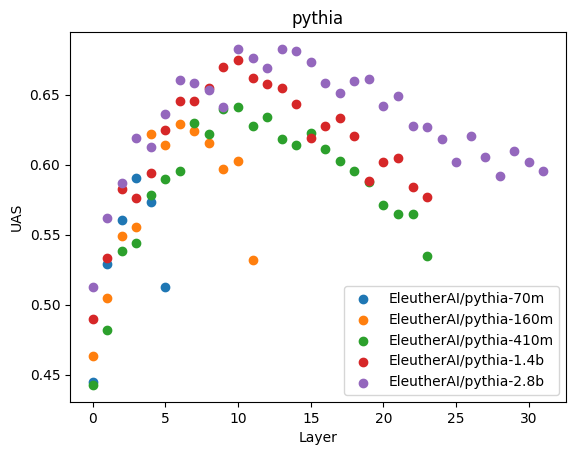

In [19]:
import matplotlib.pyplot as plt

for kwargs in plot.plt_scatter_kwargs:
    plt.scatter(**kwargs)
plt.xlabel('Layer')
plt.ylabel('UAS')
plt.title(plot.title)
plt.legend()
plt.show()



In [30]:
import json
import numpy as np

with open('gpt2_surprisal.json', 'r') as f:
    gpt_surprisal_results = json.load(f)

gpt_surprisal_results = [np.mean(list(task_surprisal.values())) for k, task_surprisal in gpt_surprisal_results.items()]


In [33]:
with open('llama_surprisal.json', 'r') as f:
    llama_surprisal_results = json.load(f)
llama_surprisal_results = [np.mean(list(task_surprisal.values())) for k, task_surprisal in llama_surprisal_results.items()]

with open('EleutherAI_pythia_surprisal.json', 'r') as f:
    pythia_surprisal_results = json.load(f)
pythia_surprisal_results = [np.mean(list(task_surprisal.values())) for k, task_surprisal in pythia_surprisal_results.items()]


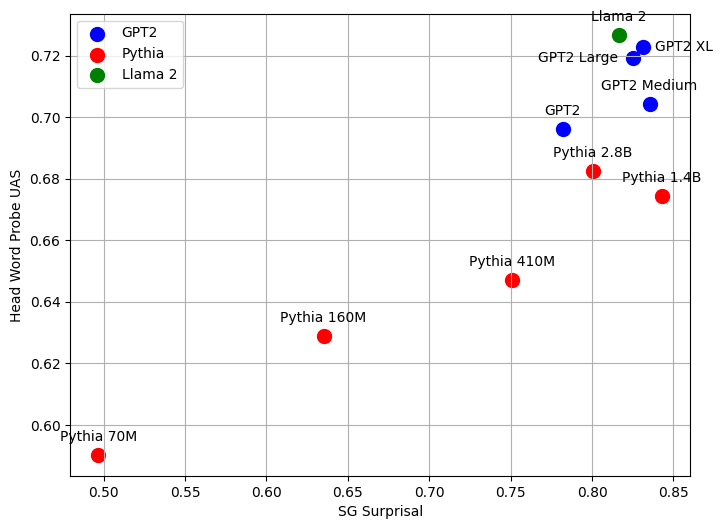

In [54]:
import matplotlib.pyplot as plt

# Create the scatter plot
plt.figure(figsize=(8, 6))  # Set the figure size

# Plot the first set of points in blue
plt.scatter(gpt_surprisal_results, gpt_probe_results, color='blue', label='GPT2', s=100)  # Set marker size to 100
gpt_labels = ['GPT2', 'GPT2 Medium', 'GPT2 Large', 'GPT2 XL']

# Plot the second set of points in red
plt.scatter(pythia_surprisal_results, pythia_probe_results, color='red', label='Pythia', s=100)
pythia_labels = ['Pythia 70M', 'Pythia 160M', 'Pythia 410M', 'Pythia 1.4B', 'Pythia 2.8B']

plt.scatter(llama_surprisal_results, llama_probe_results, color='green', label='Llama 2', s=100)
llama_labls = ['Llama 2']

# Add labels to each data point
for i, txt in enumerate(gpt_labels):
    plt.annotate(txt, (gpt_surprisal_results[i], gpt_probe_results[i]), textcoords="offset points", xytext=(0, 10), ha='center')
    if i == 1:
        break

plt.annotate('GPT2 Large', (gpt_surprisal_results[2], gpt_probe_results[2]), textcoords="offset points", xytext=(-40, -3), ha='center')
plt.annotate('GPT2 XL', (gpt_surprisal_results[3], gpt_probe_results[3]), textcoords="offset points", xytext=(30, -3), ha='center')


for i, txt in enumerate(pythia_labels):
    plt.annotate(txt, (pythia_surprisal_results[i], pythia_probe_results[i]), textcoords="offset points", xytext=(0, 10), ha='center')

for i, txt in enumerate(llama_labls):
    plt.annotate(txt, (llama_surprisal_results[i], llama_probe_results[i]), textcoords="offset points", xytext=(0, 10), ha='center')
# Add labels and title
plt.xlabel('SG Surprisal')
plt.ylabel('Head Word Probe UAS')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

In [50]:
gpt_probe_results

[0.6961252592092081, 0.7042568559379296, 0.7192385656702159, 0.722896619212936]

In [51]:
gpt_surprisal_results

[0.7820890140953406, 0.835331615483722, 0.8254191264606529, 0.8311091026799736]